In [1]:
import tensorflow as tf
import os
import time
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from nilearn import image
from nilearn import plotting
import nibabel as nib
from nilearn.plotting import plot_stat_map, plot_anat, plot_img
from nilearn.image import concat_imgs, mean_img

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
Matplotlib created a temporary config/cache directory at /tmp/pbs.3744058.pbsha.ib.sockeye/matplotlib-f21rowhw because the default path (/home/mkhademi/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
data_dir = '/arc/project/st-ipor-1/mkhademi/BOLD5000_2.0/'
roi_dir = data_dir + 'BOLD5000_GLMsingle_ROI_betas/py/'
subjs = ['CSI1', 'CSI2', 'CSI3', 'CSI4']
sub = subjs[0]  
brain_mask = nib.load(data_dir + sub + '_brainmask.nii.gz')
# brain_mask = image.load_img(data_dir + sub + '_brainmask.nii.gz')
data = brain_mask.get_fdata()
print(data)
print(data.shape)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
(71, 89, 7

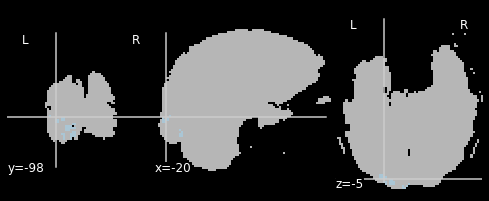

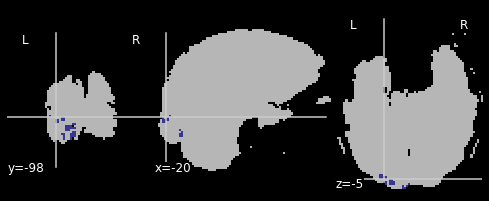

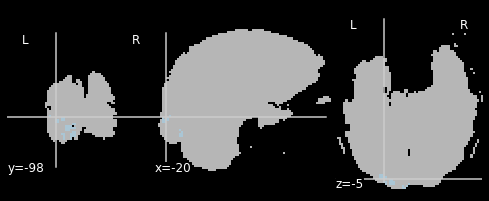

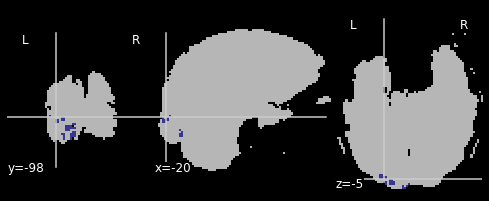

In [3]:
roi_name = 'LHEarlyVis'
mask_filename = data_dir + 'spm/sub-' + sub + '/sub-' + sub + '_mask-' + roi_name + '.nii.gz'
plotting.plot_roi(mask_filename, bg_img=brain_mask, cmap='Paired')
plotting.plot_roi(mask_filename, bg_img=brain_mask)
brain_mask = image.load_img(data_dir + sub + '_brainmask.nii.gz')
plotting.plot_roi(mask_filename, bg_img=brain_mask, cmap='Paired')
plotting.plot_roi(mask_filename, bg_img=brain_mask)

In [4]:
print(tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True


2022-05-15 06:44:43.995656: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2022-05-15 06:44:44.004602: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2200000000 Hz
2022-05-15 06:44:44.004802: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55555ac83e60 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-05-15 06:44:44.004814: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-05-15 06:44:44.007692: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-05-15 06:44:44.183541: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55555ac97bd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-05-15 06:44:44.183561: I tensorflow/compi